## PHASE-3-PROJECT

## Overview 

A pandemic brought on by the H1N1 influenza virus, also known as "swine flu," started in the spring of 2009. According to research, it caused anywhere from 151,000 to 575,000 deaths worldwide in the first year.

In October 2009, an H1N1 flu vaccination became widely accessible. The National 2009 H1N1 Flu Survey was carried out in the US in late 2009 and early 2010. In addition to personal information, this phone poll also questioned participants if they had gotten the H1N1 and seasonal flu vaccines. These extra questions included their social, economic, and demographic background, viewpoints on disease risks and the efficacy of vaccinations, as well as actions aimed at reducing transmission. A clearer knowledge of the connections between these traits and individual vaccination habits can

<div>
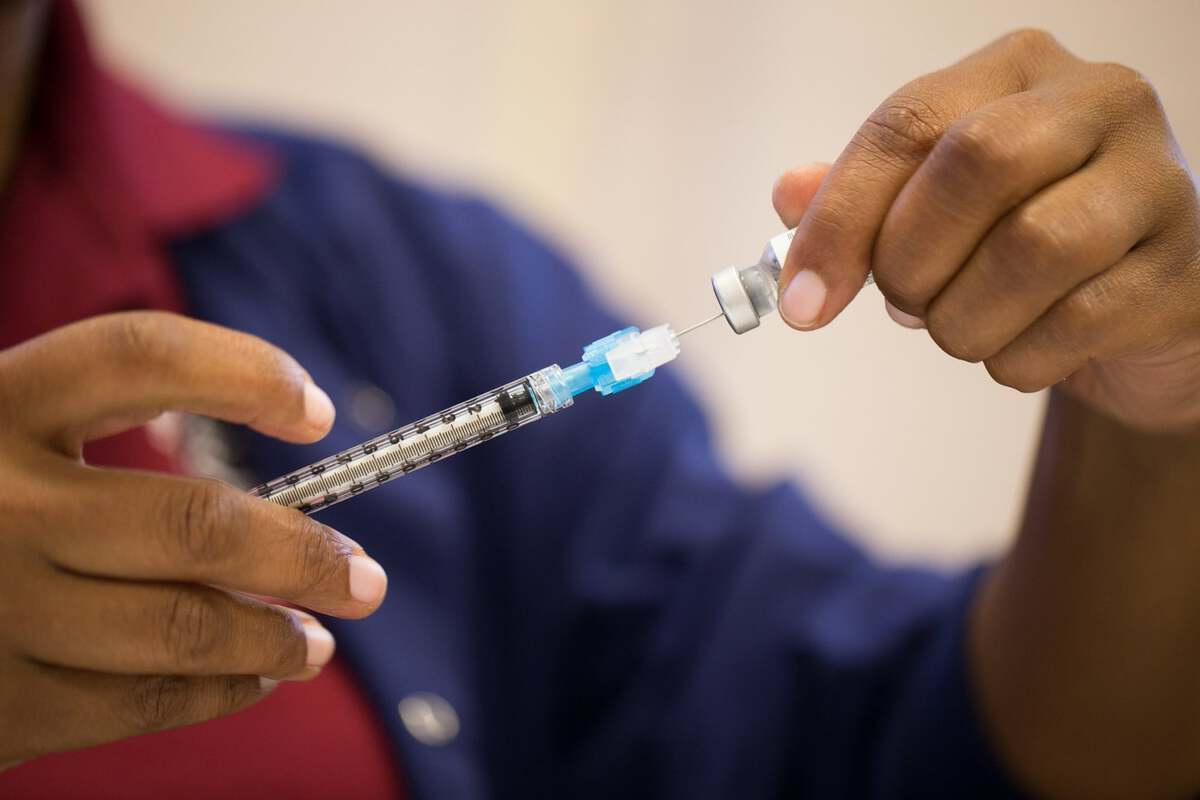
</div>

# BUSINESS UNDERSTANDING


Beginning in spring 2009, a pandemic caused by the H1N1 influenza virus, colloquially named "swine flu," swept across the world. Researchers estimate that in the first year, it was responsible for between 151,000 to 575,000 deaths globally.
A vaccine for the H1N1 flu virus became publicly available in October 2009. In late 2009 and early 2010, the United States conducted the National 2009 H1N1 Flu Survey. This phone survey asked respondents whether they had received the H1N1 and seasonal flu vaccines, in conjunction with questions about themselves. These additional questions covered their social, economic, and demographic background, opinions on risks of illness and vaccine effectiveness, and behaviors towards mitigating transmission. A better understanding of how these characteristics are associated with personal vaccination patterns can provide guidance for future public health efforts.

# DATA UNDERSTANDING

<a href="https://www.drivendata.org/competitions/66/flu-shot-learning/page/210/">Driven Data</a>
 provided the dataset that was used for this analysis. Data from the National 2009 H1N1 Flu Survey was used to compile this study (NHFS). The data consists of three files: training set labels(26707rows,3 columns), training set features (26707 rows, 36 columns), and test set features (26707 rows, 36 columns).
The National Center for Immunization and Respiratory Diseases (NCIRD) sponsored the National 2009 H1N1 Flu Survey (NHFS), which was carried out by NCIRD, the National Center for Health Statistics (NCHS), and the Centers for Disease Control and Prevention (CDC). The National Household Flu Survey (NHFS) was a list-assisted random-digit-dialing telephone survey of households conducted in 2009–2010 to track influenza vaccine coverage.

All individuals living in the United States at the time of the interview who were 6 months or older were the target group for the NHFS. Timely estimates of vaccination coverage rates for both the monovalent pH1N1 and trivalent seasonal influenza vaccines were produced using data from the NHFS.
 
 
 The information in the data is as follows:

* h1n1_concern - Level of concern about the H1N1 flu.
* h1n1_knowledge - Level of knowledge about H1N1 flu.
* behavioral_antiviral_meds - Has taken antiviral medications. (binary)
* behavioral_avoidance - Has avoided close contact with others with flu-like symptoms. (binary)
* behavioral_face_mask - Has bought a face mask. (binary)
* behavioral_wash_hands - Has frequently washed hands or used hand sanitizer. (binary)
* behavioral_large_gatherings - Has reduced time at large gatherings. (binary)
* behavioral_outside_home - Has reduced contact with people outside of own household. (binary)
* behavioral_touch_face - Has avoided touching eyes, nose, or mouth. (binary)
* doctor_recc_h1n1 - H1N1 flu vaccine was recommended by doctor. (binary)
* doctor_recc_seasonal - Seasonal flu vaccine was recommended by doctor. (binary)
* chronic_med_condition - Has any of the following chronic medical conditions: asthma or an other lung condition, diabetes, a heart condition, a kidney condition, sickle cell anemia or other anemia, a neurological or neuromuscular condition, a liver condition, or a weakened immune system caused by a chronic illness or by medicines taken for a chronic illness. (binary)
* child_under_6_months - Has regular close contact with a child under the age of six months. (binary)
* health_worker - Is a healthcare worker. (binary)
* health_insurance - Has health insurance. (binary)
* opinion_h1n1_vacc_effective - Respondent's opinion about H1N1 vaccine effectiveness.
* opinion_h1n1_risk - Respondent's opinion about risk of getting sick with H1N1 flu without vaccine.
* opinion_h1n1_sick_from_vacc - Respondent's worry of getting sick from taking H1N1 vaccine.
* opinion_seas_vacc_effective - Respondent's opinion about seasonal flu vaccine effectiveness.
* opinion_seas_risk - Respondent's opinion about risk of getting sick with seasonal flu without vaccine.
* opinion_seas_sick_from_vacc - Respondent's worry of getting sick from taking seasonal flu vaccine.
* age_group - Age group of respondent.
* education - Self-reported education level.
* race - Race of respondent.
* sex - Sex of respondent.
* income_poverty - Household annual income of respondent with respect to 2008 Census poverty thresholds.
* marital_status - Marital status of respondent.
* rent_or_own - Housing situation of respondent.
* employment_status - Employment status of respondent.
* hhs_geo_region - Respondent's residence using a 10-region geographic classification defined by the U.S. Dept. of Health and Human Services. Values are represented as short random character strings.
* census_msa - Respondent's residence within metropolitan statistical areas (MSA) as defined by the U.S. Census.
* household_adults - Number of other adults in household, top-coded to 3.
* household_children - Number of children in household, top-coded to 3.
* employment_industry - Type of industry respondent is employed in. Values are represented as short random character strings.
* employment_occupation - Type of occupation of respondent. Values are represented as short random character strings.

# Main Objective
The goal is to predict how likely individuals are to receive their H1N1 and seasonal flu vaccines. Specifically,predicting two probabilities: one for h1n1_vaccine and one for seasonal_vaccine.

# Metric of success
Performance will be evaluated according to the area under the receiver operating characteristic curve (ROC AUC) for each of the two target variables. 

# DATA PREPARATION

# Loading Data

In [2]:
# loading all the necessary libraries
import pandas as pd
import sqlite3
import numpy as np
import seaborn as sns 
import json
import matplotlib.pyplot as plt
%matplotlib inline
import csv

Test set features

In [3]:
#loading the test_set_features dataset
test_set_features=pd.read_csv ('test_set_features.csv')
test_set_features.head()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,26707,2.0,2.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,"> $75,000",Not Married,Rent,Employed,mlyzmhmf,"MSA, Not Principle City",1.0,0.0,atmlpfrs,hfxkjkmi
1,26708,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,Non-MSA,3.0,0.0,atmlpfrs,xqwwgdyp
2,26709,2.0,2.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,...,"> $75,000",Married,Own,Employed,lrircsnp,Non-MSA,1.0,0.0,nduyfdeo,pvmttkik
3,26710,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Married,Own,Not in Labor Force,lrircsnp,"MSA, Not Principle City",1.0,0.0,NaN,NaN
4,26711,3.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,lzgpxyit,Non-MSA,0.0,1.0,fcxhlnwr,mxkfnird


In [4]:
#checking for all the information on the dataset
test_set_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26708 entries, 0 to 26707
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26708 non-null  int64  
 1   h1n1_concern                 26623 non-null  float64
 2   h1n1_knowledge               26586 non-null  float64
 3   behavioral_antiviral_meds    26629 non-null  float64
 4   behavioral_avoidance         26495 non-null  float64
 5   behavioral_face_mask         26689 non-null  float64
 6   behavioral_wash_hands        26668 non-null  float64
 7   behavioral_large_gatherings  26636 non-null  float64
 8   behavioral_outside_home      26626 non-null  float64
 9   behavioral_touch_face        26580 non-null  float64
 10  doctor_recc_h1n1             24548 non-null  float64
 11  doctor_recc_seasonal         24548 non-null  float64
 12  chronic_med_condition        25776 non-null  float64
 13  child_under_6_mo

In [5]:
#checking the shape of the dataset
test_set_features.shape

(26708, 36)

Dealing with missing values 

In [6]:
#finding any null and missing values 
test_set_features.isna().sum()

respondent_id                      0
h1n1_concern                      85
h1n1_knowledge                   122
behavioral_antiviral_meds         79
behavioral_avoidance             213
behavioral_face_mask              19
behavioral_wash_hands             40
behavioral_large_gatherings       72
behavioral_outside_home           82
behavioral_touch_face            128
doctor_recc_h1n1                2160
doctor_recc_seasonal            2160
chronic_med_condition            932
child_under_6_months             813
health_worker                    789
health_insurance               12228
opinion_h1n1_vacc_effective      398
opinion_h1n1_risk                380
opinion_h1n1_sick_from_vacc      375
opinion_seas_vacc_effective      452
opinion_seas_risk                499
opinion_seas_sick_from_vacc      521
age_group                          0
education                       1407
race                               0
sex                                0
income_poverty                  4497
m

There are too many missing values in the dataset, so I filled them instead of discarding them.

In [7]:
#filling the missing values with 0 & 1 as per the instructions
#filling features with 0
features = ['h1n1_concern',
            'h1n1_knowledge',
            'behavioral_antiviral_meds',
            'behavioral_avoidance',
            'behavioral_face_mask',
            'behavioral_wash_hands',
            'behavioral_large_gatherings',
            'behavioral_outside_home',
            'behavioral_touch_face',
            'doctor_recc_h1n1',
            'doctor_recc_seasonal',
            'chronic_med_condition',
            'child_under_6_months',
            'health_worker',
            'health_insurance','household_adults','household_children']
#filling labels with 1 
labels=['opinion_h1n1_vacc_effective', 'opinion_h1n1_risk','opinion_h1n1_sick_from_vacc','opinion_seas_vacc_effective', 
         'opinion_seas_risk', 'opinion_seas_sick_from_vacc']

test_set_features[features]=test_set_features[features].fillna(0)
test_set_features[labels]=test_set_features[labels].fillna(1)

In [8]:
#filling the missing strings with nill
basics = [
    'income_poverty',
    'marital_status', 'rent_or_own', 'employment_status', 'hhs_geo_region',  'education']


occupation = ['employment_industry',
              'employment_occupation','income_poverty']

test_set_features[basics] = test_set_features[basics].fillna('Nill')
test_set_features[occupation] = test_set_features[occupation].fillna('Nill')

In [9]:
#rechecking for missing values
test_set_features.isna().sum()

respondent_id                  0
h1n1_concern                   0
h1n1_knowledge                 0
behavioral_antiviral_meds      0
behavioral_avoidance           0
behavioral_face_mask           0
behavioral_wash_hands          0
behavioral_large_gatherings    0
behavioral_outside_home        0
behavioral_touch_face          0
doctor_recc_h1n1               0
doctor_recc_seasonal           0
chronic_med_condition          0
child_under_6_months           0
health_worker                  0
health_insurance               0
opinion_h1n1_vacc_effective    0
opinion_h1n1_risk              0
opinion_h1n1_sick_from_vacc    0
opinion_seas_vacc_effective    0
opinion_seas_risk              0
opinion_seas_sick_from_vacc    0
age_group                      0
education                      0
race                           0
sex                            0
income_poverty                 0
marital_status                 0
rent_or_own                    0
employment_status              0
hhs_geo_re

Checking For Duplicates

In [10]:
#checking for any duplicates in the dataset
test_set_features.duplicated().sum()

0

Training set features

In [11]:
#loading the training_set_features dataset
training_set_features=pd.read_csv ('training_set_features.csv')
training_set_features.head(10)

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb
5,5,3.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,"<= $75,000, Above Poverty",Married,Own,Employed,atmpeygn,"MSA, Principle City",2.0,3.0,saaquncn,vlluhbov
6,6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",0.0,0.0,xicduogh,xtkaffoo
7,7,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,"<= $75,000, Above Poverty",Married,Own,Employed,bhuqouqj,Non-MSA,2.0,0.0,pxcmvdjn,xqwwgdyp
8,8,0.0,2.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,...,"> $75,000",Married,Own,Employed,bhuqouqj,"MSA, Not Principle City",1.0,0.0,xicduogh,ccgxvspp
9,9,2.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,"<= $75,000, Above Poverty",Not Married,Own,Not in Labor Force,qufhixun,"MSA, Not Principle City",0.0,0.0,NaN,NaN


In [12]:
#checking for the info and shape of the dataset
training_set_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26707 non-null  int64  
 1   h1n1_concern                 26615 non-null  float64
 2   h1n1_knowledge               26591 non-null  float64
 3   behavioral_antiviral_meds    26636 non-null  float64
 4   behavioral_avoidance         26499 non-null  float64
 5   behavioral_face_mask         26688 non-null  float64
 6   behavioral_wash_hands        26665 non-null  float64
 7   behavioral_large_gatherings  26620 non-null  float64
 8   behavioral_outside_home      26625 non-null  float64
 9   behavioral_touch_face        26579 non-null  float64
 10  doctor_recc_h1n1             24547 non-null  float64
 11  doctor_recc_seasonal         24547 non-null  float64
 12  chronic_med_condition        25736 non-null  float64
 13  child_under_6_mo

In [13]:
#checking for the shape of the dataset
training_set_features.shape

(26707, 36)

Dealing with duplicates and missing values

In [14]:
#checking for duplicates in the dataset
training_set_features.duplicated().sum()

0

In [15]:
#dealing with missing values
training_set_features.isna().sum()

respondent_id                      0
h1n1_concern                      92
h1n1_knowledge                   116
behavioral_antiviral_meds         71
behavioral_avoidance             208
behavioral_face_mask              19
behavioral_wash_hands             42
behavioral_large_gatherings       87
behavioral_outside_home           82
behavioral_touch_face            128
doctor_recc_h1n1                2160
doctor_recc_seasonal            2160
chronic_med_condition            971
child_under_6_months             820
health_worker                    804
health_insurance               12274
opinion_h1n1_vacc_effective      391
opinion_h1n1_risk                388
opinion_h1n1_sick_from_vacc      395
opinion_seas_vacc_effective      462
opinion_seas_risk                514
opinion_seas_sick_from_vacc      537
age_group                          0
education                       1407
race                               0
sex                                0
income_poverty                  4423
m

In [16]:
#filling the missing values with 0 & 1 
#filling features with 0
features = ['h1n1_concern',
            'h1n1_knowledge',
            'behavioral_antiviral_meds',
            'behavioral_avoidance',
            'behavioral_face_mask',
            'behavioral_wash_hands',
            'behavioral_large_gatherings',
            'behavioral_outside_home',
            'behavioral_touch_face',
            'doctor_recc_h1n1',
            'doctor_recc_seasonal',
            'chronic_med_condition',
            'child_under_6_months',
            'health_worker',
            'health_insurance', 'household_adults','household_children']

#filling labels with 1
labels=['opinion_h1n1_vacc_effective', 'opinion_h1n1_risk','opinion_h1n1_sick_from_vacc','opinion_seas_vacc_effective', 
         'opinion_seas_risk', 'opinion_seas_sick_from_vacc']

training_set_features[features]=training_set_features[features].fillna(0)
training_set_features[labels]=training_set_features[labels].fillna(1)

In [17]:
#filling the missing strings with nill
basics = [
    'income_poverty',
    'marital_status', 'rent_or_own', 'employment_status', 'hhs_geo_region',  'education']


occupation = ['employment_industry',
              'employment_occupation','income_poverty']

training_set_features[basics] = training_set_features[basics].fillna('Nill')
training_set_features[occupation] = training_set_features[occupation].fillna('Nill')

In [18]:
training_set_features.isna().sum()

respondent_id                  0
h1n1_concern                   0
h1n1_knowledge                 0
behavioral_antiviral_meds      0
behavioral_avoidance           0
behavioral_face_mask           0
behavioral_wash_hands          0
behavioral_large_gatherings    0
behavioral_outside_home        0
behavioral_touch_face          0
doctor_recc_h1n1               0
doctor_recc_seasonal           0
chronic_med_condition          0
child_under_6_months           0
health_worker                  0
health_insurance               0
opinion_h1n1_vacc_effective    0
opinion_h1n1_risk              0
opinion_h1n1_sick_from_vacc    0
opinion_seas_vacc_effective    0
opinion_seas_risk              0
opinion_seas_sick_from_vacc    0
age_group                      0
education                      0
race                           0
sex                            0
income_poverty                 0
marital_status                 0
rent_or_own                    0
employment_status              0
hhs_geo_re

Training set labels

In [19]:
#loading the training_set_labels dataset
training_set_labels=pd.read_csv ('training_set_labels.csv')
training_set_labels.head(10)

,respondent_id,h1n1_vaccine,seasonal_vaccine
0,0,0,0
1,1,0,1
2,2,0,0
3,3,0,1
4,4,0,0
5,5,0,0
6,6,0,0
7,7,1,1
8,8,0,0
9,9,0,0


In [20]:
#checking for info
training_set_labels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   respondent_id     26707 non-null  int64
 1   h1n1_vaccine      26707 non-null  int64
 2   seasonal_vaccine  26707 non-null  int64
dtypes: int64(3)
memory usage: 626.1 KB


In [21]:
#checking for number of rows and columns on the dataset 
training_set_labels.shape

(26707, 3)

In [22]:
#checking for duplicates
training_set_labels.duplicated().sum()

0

In [23]:
#loading the submission_format dataset
submission_format=pd.read_csv ('submission_format.csv')
submission_format.head(10)

,respondent_id,h1n1_vaccine,seasonal_vaccine
0,26707,0.5,0.7
1,26708,0.5,0.7
2,26709,0.5,0.7
3,26710,0.5,0.7
4,26711,0.5,0.7
5,26712,0.5,0.7
6,26713,0.5,0.7
7,26714,0.5,0.7
8,26715,0.5,0.7
9,26716,0.5,0.7


# Data Preparation

Merging relevant datasets 



Setting index for both of the datasets that will be merged

In [24]:
#merging the training_features and training_set_labels 
#set index for the merged dataset 
training_set_features.set_index('respondent_id')
training_set_features.head()


,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,Nill,Nill
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,Nill,Nill
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb


In [25]:
training_set_labels.set_index('respondent_id')
training_set_labels

,respondent_id,h1n1_vaccine,seasonal_vaccine
0,0,0,0
1,1,0,1
2,2,0,0
3,3,0,1
4,4,0,0
...,...,...,...
26702,26702,0,0
26703,26703,0,0
26704,26704,0,1
26705,26705,0,0


In [26]:
#merging the datasets
features_and_labels = training_set_features.merge(training_set_labels, on = 'respondent_id', how ='inner')
features_and_labels.head()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,h1n1_vaccine,seasonal_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,Nill,Nill,0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe,0,1
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo,0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,Nill,Nill,0,1
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb,0,0


In [27]:
#rechecking for missing values
features_and_labels.isna().sum()

respondent_id                  0
h1n1_concern                   0
h1n1_knowledge                 0
behavioral_antiviral_meds      0
behavioral_avoidance           0
behavioral_face_mask           0
behavioral_wash_hands          0
behavioral_large_gatherings    0
behavioral_outside_home        0
behavioral_touch_face          0
doctor_recc_h1n1               0
doctor_recc_seasonal           0
chronic_med_condition          0
child_under_6_months           0
health_worker                  0
health_insurance               0
opinion_h1n1_vacc_effective    0
opinion_h1n1_risk              0
opinion_h1n1_sick_from_vacc    0
opinion_seas_vacc_effective    0
opinion_seas_risk              0
opinion_seas_sick_from_vacc    0
age_group                      0
education                      0
race                           0
sex                            0
income_poverty                 0
marital_status                 0
rent_or_own                    0
employment_status              0
hhs_geo_re

# Exploratory Data Analysis (EDA)

EDA is a detailed analysis designed to reveal a data set's underlying structure. It is significant because it reveals trends, patterns, and linkages that are not readily apparent.

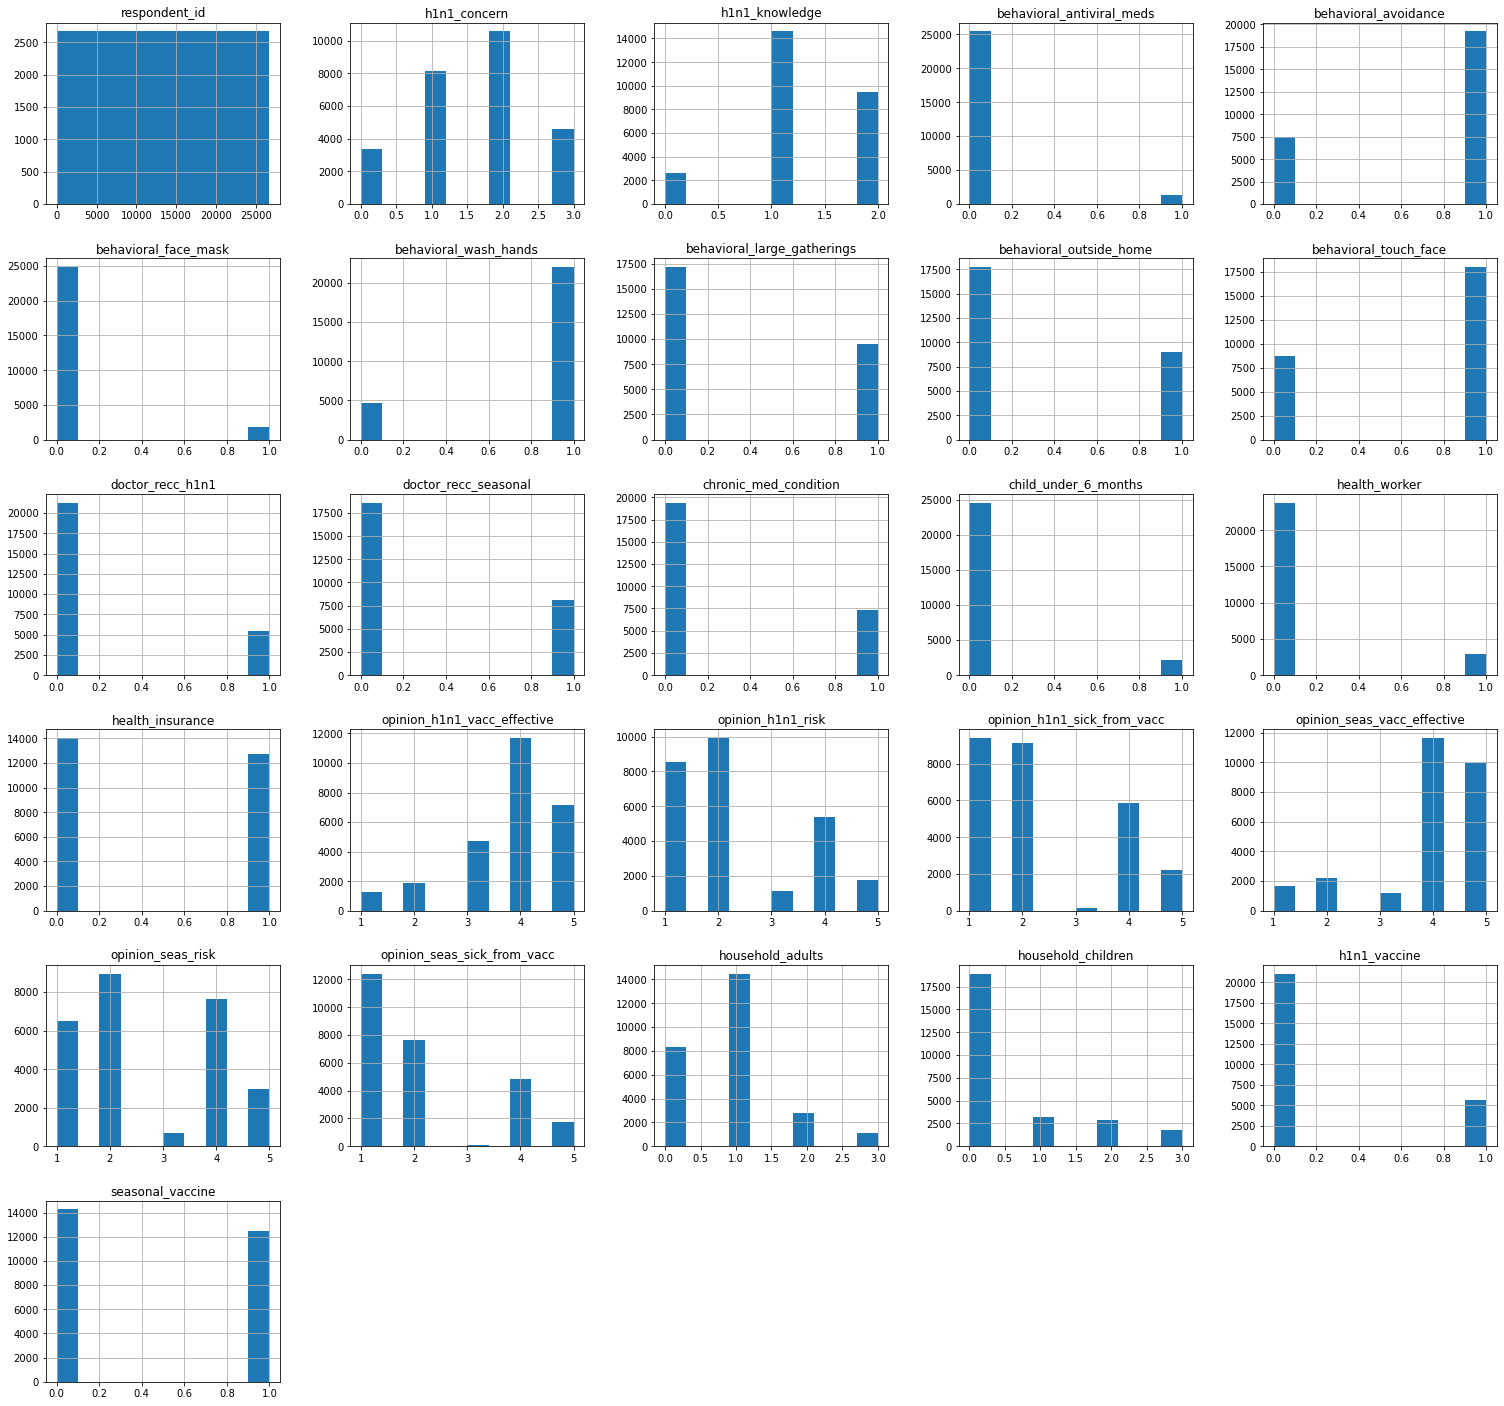

In [28]:
features_and_labels.hist(figsize=(26,25))
plt.show();

The graphs demonstrate the distribution that is describing the relationship of observations of different heights.

# Is there a correlation between chronic ill patients and H1N1 vaccine?

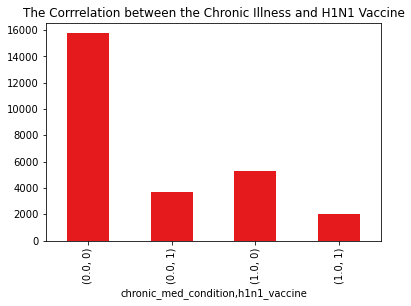

In [29]:
#Visualizing the Corrrelation between the Chronic Illness Patients and H1N1 Vaccine
chronic_vacc = features_and_labels.groupby('chronic_med_condition')
chronic_vacc['h1n1_vaccine'].value_counts().plot(kind="bar",colormap='Set1', title = 'The Corrrelation between the Chronic Illness and H1N1 Vaccine');

This graph demonstrates that less than 2,000 persons with chronic illness took the H1N1 vaccine. 

# Does the seasonal vaccine affect persons with chronic illnesses?

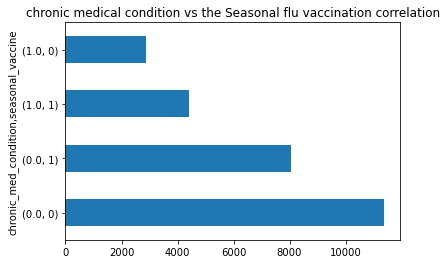

In [30]:
#visualizing the correlation btwn seasonal flu vaccine and chronic medical condition
gen_and_svacc = features_and_labels.groupby('chronic_med_condition')
gen_and_svacc['seasonal_vaccine'].value_counts().plot(kind="barh", title = 'chronic medical condition vs the Seasonal flu vaccination correlation');

More than 4000 persons with chronic medical conditions received the seasonal vaccine, according to the plot.

# Is there a connection between gender and the seasonal flu vaccine?

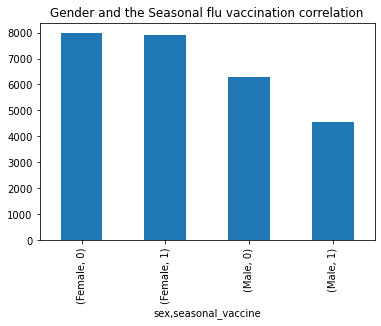

In [31]:
#visualizing the correlation btwn seasonal flu vaccine and gender
gen_and_svacc = features_and_labels.groupby('sex')
gen_and_svacc['seasonal_vaccine'].value_counts().plot(kind="bar", title = 'Gender and the Seasonal flu vaccination correlation');

The seasonal flu vaccine was taken by more females than males.

# Does the h1n1 vaccine affect gender?

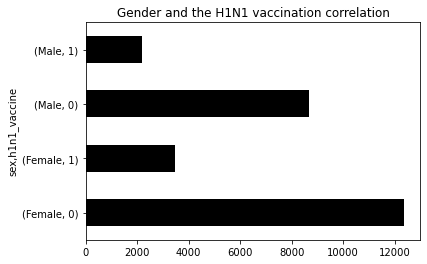

In [32]:
#Visualizing the Corrrelation between gender and h1n1 vaccine
gen_and_hvacc = features_and_labels.groupby('sex')
gen_and_hvacc['h1n1_vaccine'].value_counts().plot(kind="barh",colormap='copper', title = 'Gender and the H1N1 vaccination correlation',);

This plot shows that more females than males received the H1N1 vaccine.

# Is there a relationship between race and age?

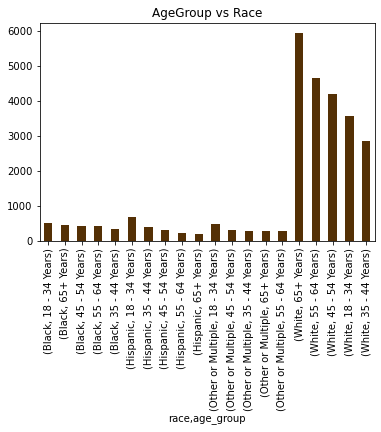

In [33]:
#visualizing  the correlation between race and agegroup
race_and_age =features_and_labels.groupby('race')
race_and_age['age_group'].value_counts().plot(kind="bar",colormap='BrBG', title = 'AgeGroup vs Race');


The plot suggests that there were more white people between the ages of 35 and 65 followed by Hispanic between the ages of 18 and 34 and other or by multiples of the same age bracket as Hispanic.

# How race is impacted by the h1n1 vaccine

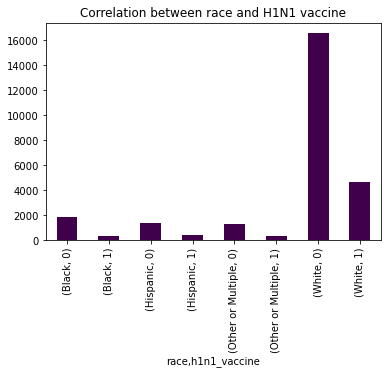

In [34]:
#Plotting a graph to find any correlation between race and the h1n1 vaccine
vacc_and_race =features_and_labels.groupby('race')
vacc_and_race['h1n1_vaccine'].value_counts().plot(kind="bar",colormap='PRGn', title = 'Correlation between race and H1N1 vaccine');

More than 4000 white people, followed by Hispanic, other or multiple persons, and the least number of Black people, received the H1N1 vaccine.

# Does race affect seasonal vaccination?

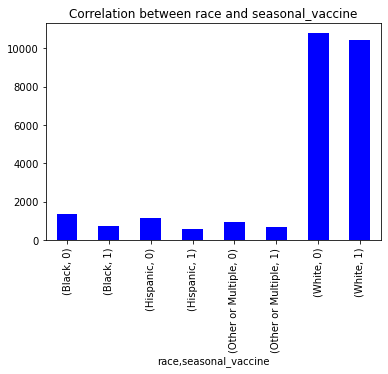

In [35]:
#Plotting a graph to find any correlation between race and the seasonal vaccine
svacc_and_race =features_and_labels.groupby('race')
svacc_and_race['seasonal_vaccine'].value_counts().plot(kind="bar",colormap='bwr', title = 'Correlation between race and seasonal_vaccine');

The seasonal vaccine was received by more than 10,000 White people, oover 1000 other or multiple people, less than 1000 Hipanic people, and fewer than 2000 Black people.

# Are the H1N1 vaccine and health insurance related?

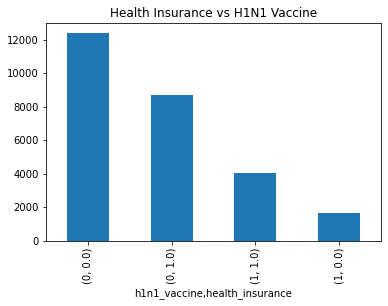

In [36]:
#Visualizing the relation that health insurance and h1n1 vaccine has
insurance_and_hvacc =features_and_labels.groupby('h1n1_vaccine')
insurance_and_hvacc['health_insurance'].value_counts().plot(kind="bar", title = 'Health Insurance vs H1N1 Vaccine');

Over 12,000 people without health insurance did not receive the H1N1 vaccine, compared to little over 4,000 people with insurance.

# What connection does a seasonal vaccine have to health insurance?

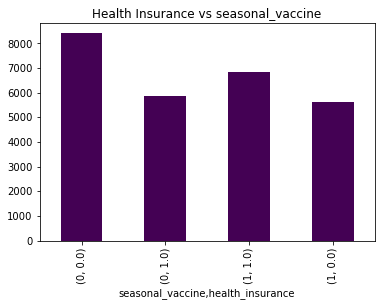

In [37]:
#Visualizing the correlation btwn health insurance and seasonal_vaccine 
insurance_and_svacc =features_and_labels.groupby('seasonal_vaccine')
insurance_and_svacc['health_insurance'].value_counts().plot(kind="bar",colormap='viridis', title = 'Health Insurance vs seasonal_vaccine');

Nearly 7000 individuals with health insurance received the seasonal flu vaccine.

# Did patients who received the H1N1 vaccine react differently after doctors' recommendations?

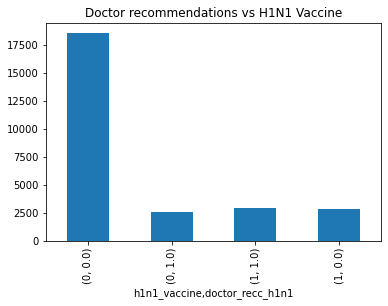

In [38]:
#visualizing doctors recommendation and h1n1 vaccine
doc_and_vacc =features_and_labels.groupby('h1n1_vaccine')
doc_and_vacc['doctor_recc_h1n1'].value_counts().plot(kind="bar", title = 'Doctor recommendations vs H1N1 Vaccine');

Over 2500 people received the H1N1 vaccine on doctors' recommendations, whereas more than 17500 declined to receive it.

# Did patients who received the seasonal vaccine react differently after doctors' recommendations?

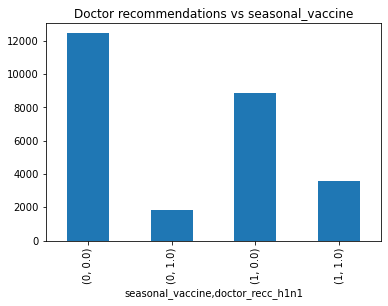

In [39]:
#visualizing doctors recommendation and seasonal_vaccine
doc_and_vacc =features_and_labels.groupby('seasonal_vaccine')
doc_and_vacc['doctor_recc_h1n1'].value_counts().plot(kind="bar", title = 'Doctor recommendations vs seasonal_vaccine');

Due to the doctor's recommendations, less than 4,000 persons received the seasonal flu vaccine.

# Is there a link between the h1n1 vaccine and seasonal flu?

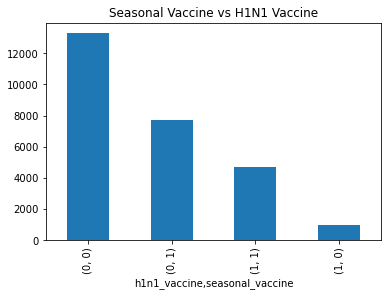

In [40]:
#visualizing the correlation btwn seasonal flu and h1n1 vaccine
seas_and_h1vacc =features_and_labels.groupby('h1n1_vaccine')
seas_and_h1vacc['seasonal_vaccine'].value_counts().plot(kind="bar", title = 'Seasonal Vaccine vs H1N1 Vaccine');

More than 4000 persons received both the H1N1 and seasonal flu vaccines. More than 12000 people skipped both.

# Were kids taken for the H1N1 vaccine?

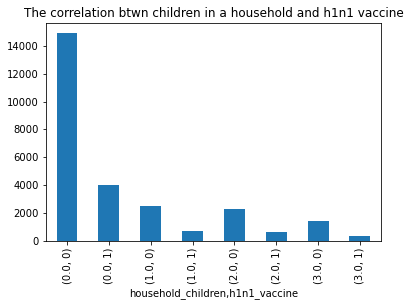

In [41]:
#visualizing the correlation btwn children in a household and h1n1 vaccine
child_and_h1vacc =features_and_labels.groupby('household_children')
child_and_h1vacc['h1n1_vaccine'].value_counts().plot(kind="bar", title = 'The correlation btwn children in a household and h1n1 vaccine');

The figure demonstrates that households with three children took the vaccine, as did those with two children, and those without children had the highest rate of no one receiving the vaccines.

# Were kids taken in for seasonal vaccine?

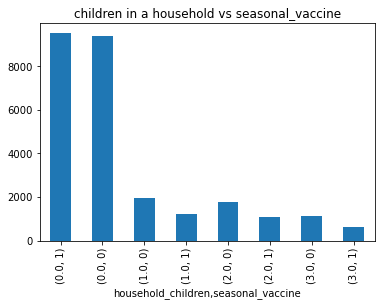

In [42]:
#visualizing the correlation btwn children in a household and seasonal_vaccine
child_and_ssvacc =features_and_labels.groupby('household_children')
child_and_ssvacc['seasonal_vaccine'].value_counts().plot(kind="bar", title = 'children in a household vs seasonal_vaccine');

The plot indicates that more than 8000 persons without children in a household received the seasonal flu vaccine, compared to less than 2000 people with a child, more than 1,000 people with two children, and less than 1,000 people with three children.

# Did access to the H1N1 vaccine depend on income?

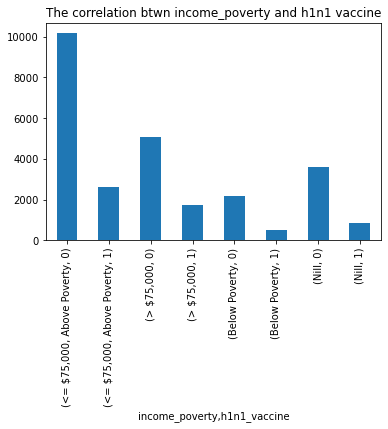

In [43]:
#visualizing the correlation btwn income_poverty and h1n1 vaccine
inc_and_h1vacc =features_and_labels.groupby('income_poverty')
inc_and_h1vacc['h1n1_vaccine'].value_counts().plot(kind="bar", title = 'The correlation btwn income_poverty and h1n1 vaccine');

Fewer than 1000 persons with incomes below the poverty line received the vaccine, but more than 4,000 people with incomes above poverty but less than or equal to $75,000 did.

# Did access to the seasonal vaccine depend on income?

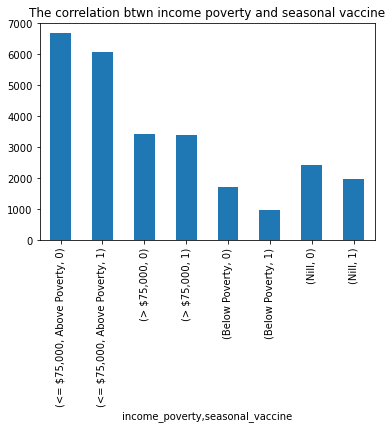

In [44]:
#visualizing the correlation btwn income_poverty and seasonal_vaccine
income_and_seas =features_and_labels.groupby('income_poverty')
income_and_seas['seasonal_vaccine'].value_counts().plot(kind="bar", title = 'The correlation btwn income poverty and seasonal vaccine');

Less than 2000 persons who were living in poverty received the seasonal vaccine, compared to more than 6000 people who were above poverty and had an income of less than or equal to $75,000.

# Did getting the H1N1 vaccine affect your marital status?

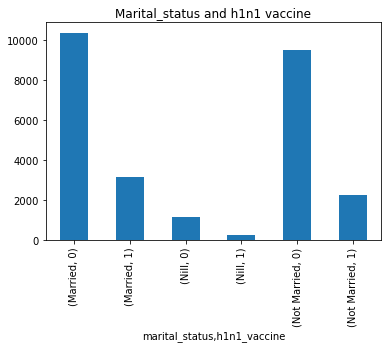

In [45]:
#visualizing the correlation btwn marital_status and h1n1 vaccine
mar_and_h1vacc =features_and_labels.groupby('marital_status')
mar_and_h1vacc['h1n1_vaccine'].value_counts().plot(kind="bar", title = 'Marital_status and h1n1 vaccine');

Over 2000 unmarried people and around 3000 married people both received the H1N1 vaccine.

# Did getting the seasonal vaccine affect your marital status?

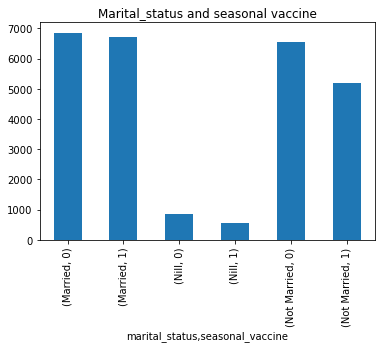

In [46]:
#visualizing the correlation btwn marital_status and seasonal_vaccine
mar_and_seas =features_and_labels.groupby('marital_status')
mar_and_seas['seasonal_vaccine'].value_counts().plot(kind="bar", title = 'Marital_status and seasonal vaccine');

More than 5000 unmarried persons and over 7000 married people both received the seasonal flu vaccine.

# Did people's work situation affect their decision to receive the H1N1 vaccine?

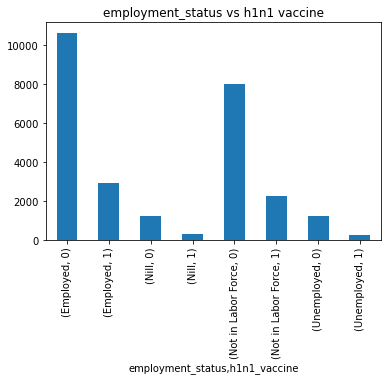

In [47]:
#visualizing the correlation btwn employemnt and h1n1 vaccine
emp_and_h1vacc =features_and_labels.groupby('employment_status')
emp_and_h1vacc['h1n1_vaccine'].value_counts().plot(kind="bar", title = 'employment_status vs h1n1 vaccine');

According to the plot, more over 3000 persons who were employed received the H1N1 vaccine, compared to less than 1000 people who were unemployed.

# Did people's work situation affect their decision to receive the season vaccine?

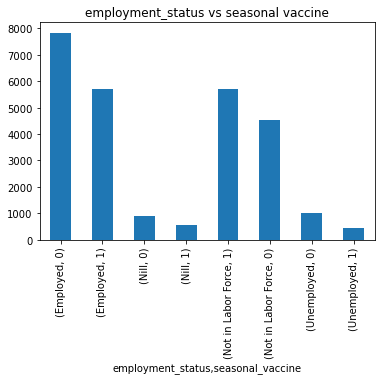

In [48]:
#visualizing the correlation btwn employment status and seasonal_vaccine
empl_and_seasvacc =features_and_labels.groupby('employment_status')
empl_and_seasvacc['seasonal_vaccine'].value_counts().plot(kind="bar", title = 'employment_status vs seasonal vaccine');

More than 5000 persons who weren't in the labor force, more than 5000 employed people, and less than 1000 unemployed people all had the vaccine

# Did health-care workers have health-care coverage?

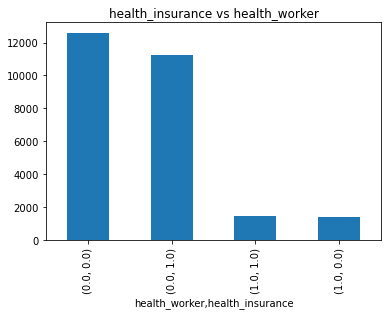

In [49]:
#visualizing the correlation btwn health workers and health insurance
empl_and_seasvacc =features_and_labels.groupby('health_worker')
empl_and_seasvacc['health_insurance'].value_counts().plot(kind="bar", title = 'health_insurance vs health_worker');

Less than 2000 healthcare professionals are shown in the plot to have health insurance.

# What level of education does the population possess?

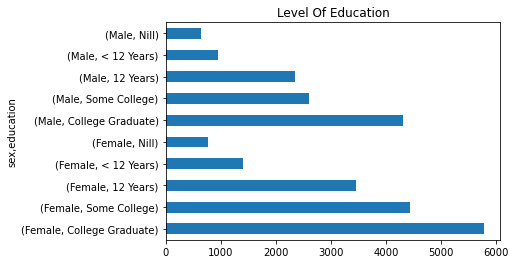

In [50]:
#visualizing the correlation btwn health workers and health insurance
empl_and_seasvacc =features_and_labels.groupby('sex')
empl_and_seasvacc['education'].value_counts().plot(kind="barh", title = 'Level Of Education');

There are more than 5,000 female college graduates compared to more than 4,000 male graduates.

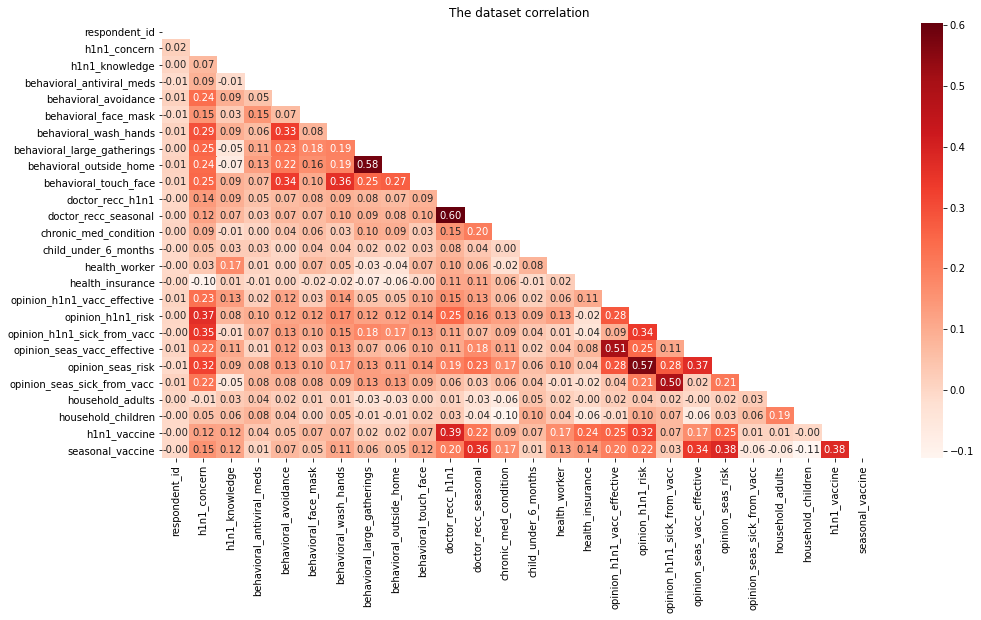

In [51]:
#correlation heatmap
plt.figure(figsize=(16,8))
mask = np.triu(np.ones_like(features_and_labels.corr(), dtype=bool))
sns.heatmap(features_and_labels.corr(),annot=True,cmap="Reds",fmt=".2f", mask=mask);
plt.title('The dataset correlation')
plt.show()

The heatmap displays the correlation in the dataset.

* Behavioural outside home and behavioural large gatherings have a correlation 0.58
* Doctors recommendation on seasonal vaccine and doctors recommendation on h1n1 vaccine have a correlation of 0.60
* Opinion seasonal vaccine effective and opinion h1n1 vaccine effective have a correlation of 0.51
* Opinion seasonal vaccine risk and opinion h1n1 vaccine risk have a correlation of 0.57
* Opinion sick from seasonal vaccine and opinion on sick from h1n1 vaccine have a correlation of 0.50


# MODELLING

Splitting Data

In [52]:
#importing relevant libraries 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(training_set_features, training_set_labels, test_size=0.33, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((17893, 36), (8814, 36), (17893, 3), (8814, 3))

In [53]:
#importing relevant libraries
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
import warnings

In [54]:
X_train

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
11702,11702,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,"<= $75,000, Above Poverty",Married,Own,Employed,oxchjgsf,Non-MSA,1.0,0.0,fcxhlnwr,haliazsg
967,967,3.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,Below Poverty,Not Married,Rent,Not in Labor Force,bhuqouqj,"MSA, Not Principle City",1.0,0.0,Nill,Nill
5547,5547,3.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,"<= $75,000, Above Poverty",Not Married,Own,Not in Labor Force,qufhixun,"MSA, Not Principle City",0.0,0.0,Nill,Nill
19590,19590,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,"> $75,000",Married,Own,Employed,fpwskwrf,"MSA, Not Principle City",1.0,2.0,fcxhlnwr,xtkaffoo
15939,15939,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,"> $75,000",Married,Rent,Employed,atmpeygn,"MSA, Principle City",1.0,0.0,fcxhlnwr,bxpfxfdn
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21575,21575,2.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,"> $75,000",Not Married,Own,Not in Labor Force,qufhixun,"MSA, Principle City",0.0,0.0,Nill,Nill
5390,5390,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,"<= $75,000, Above Poverty",Not Married,Own,Unemployed,mlyzmhmf,"MSA, Principle City",0.0,0.0,Nill,Nill
860,860,2.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,Non-MSA,1.0,0.0,atmlpfrs,xqwwgdyp
15795,15795,2.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,"> $75,000",Married,Own,Employed,kbazzjca,"MSA, Principle City",1.0,0.0,fcxhlnwr,cmhcxjea


In [55]:
#checking for non numerical features in the dataset
set_features = training_set_features[training_set_features.dtypes[training_set_features.dtypes == "object"].index].columns
set_features


Index(['age_group', 'education', 'race', 'sex', 'income_poverty',
       'marital_status', 'rent_or_own', 'employment_status', 'hhs_geo_region',
       'census_msa', 'employment_industry', 'employment_occupation'],
      dtype='object')

In [56]:
#checking for numerical features in the dataset
set_2_features = training_set_features[training_set_features.dtypes[training_set_features.dtypes != "object"].index].columns
set_2_features

Index(['respondent_id', 'h1n1_concern', 'h1n1_knowledge',
       'behavioral_antiviral_meds', 'behavioral_avoidance',
       'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_h1n1', 'doctor_recc_seasonal',
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'health_insurance', 'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk',
       'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'household_adults',
       'household_children'],
      dtype='object')

In [57]:
#Encoding the set_2_features
from sklearn.preprocessing import OrdinalEncoder

ordinal = OrdinalEncoder()
X_train[set_features] = ordinal.fit_transform(X_train[set_features])
X_train


,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
11702,11702,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,8.0,2.0,1.0,0.0,5.0,7.0
967,967,3.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,2.0,2.0,2.0,2.0,1.0,0.0,1.0,0.0,0.0,0.0
5547,5547,3.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,2.0,1.0,2.0,9.0,0.0,0.0,0.0,0.0,0.0
19590,19590,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,3.0,0.0,1.0,2.0,5.0,22.0
15939,15939,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,2.0,0.0,0.0,1.0,1.0,0.0,5.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21575,21575,2.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,1.0,2.0,1.0,2.0,9.0,1.0,0.0,0.0,0.0,0.0
5390,5390,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,2.0,1.0,3.0,7.0,1.0,0.0,0.0,0.0,0.0
860,860,2.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,9.0,2.0,1.0,0.0,2.0,21.0
15795,15795,2.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,4.0,1.0,1.0,0.0,5.0,3.0


In [58]:
#Encoding set_features
from sklearn.preprocessing import OrdinalEncoder

ordinal = OrdinalEncoder()
X_test[set_features] = ordinal.fit_transform(X_test[set_features])
X_test


,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
15772,15772,2.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,...,3.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
9407,9407,3.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,...,3.0,1.0,0.0,1.0,3.0,1.0,1.0,1.0,0.0,0.0
16515,16515,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,...,3.0,2.0,1.0,0.0,0.0,0.0,0.0,1.0,9.0,11.0
23353,23353,2.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,2.0,1.0,2.0,3.0,22.0
10008,10008,1.0,2.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,1.0,0.0,1.0,0.0,5.0,1.0,1.0,0.0,19.0,22.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1579,1579,2.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,...,0.0,0.0,1.0,2.0,0.0,2.0,1.0,1.0,0.0,0.0
20303,20303,2.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,2.0,2.0,2.0,0.0,1.0,0.0,0.0,0.0
2968,2968,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,...,0.0,2.0,2.0,0.0,6.0,0.0,0.0,0.0,5.0,7.0
21274,21274,1.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,0.0,2.0,1.0,0.0,8.0,2.0,1.0,0.0,20.0,14.0


In [59]:
#importing relevant libraries
from sklearn.preprocessing import StandardScaler

#scaling for standardization
scaler = StandardScaler()

#fit transforming X train
X_train_1 = scaler.fit_transform(X_train[set_features])

# transforming X_test
X_test_1 = scaler.transform(X_test[set_features])

X_train_1 = pd.DataFrame(data = X_train_1, columns = X_train[set_features].columns, index = X_train.index)
X_test_1 = pd.DataFrame(data = X_test_1, columns = X_test[set_features].columns, index = X_test.index)


# Logistic Regression

In [61]:
#importing relavant libraries
from sklearn.linear_model import LogisticRegression

#instantiation
model_1 = LogisticRegression(random_state=42)


In [62]:
#dropping respondent id column for h1n1
y_train_vacc1 = y_train.drop(columns=['respondent_id', 'seasonal_vaccine'])
y_test_vacc1 = y_test.drop(columns=['respondent_id', 'seasonal_vaccine'])

In [190]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split


# Create a Logistic Regression object
clf = LogisticRegression()

# Fit the model to the training data
clf.fit(X_train, y_train_vacc1)

# Predict the target variable for the test data
y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_predic, y_test_vacc1)
print('Accuracy:', accuracy)
precision = precision_score(y_test_vacc1, y_predic)
print('Precision:', precision)
recall = recall_score(y_test_vacc1, y_predic)
print('Recall:', recall)

#evaluating the model using cross validation
warnings.simplefilter('ignore')

model_1_neg_log_loss_crossval = cross_val_score(model_1, X_train, y_train_vacc1, scoring='neg_log_loss', error_score='raise')

model_1_neg = -(model_1_neg_log_loss_crossval.mean())
print('Cross Validation:', model_1_neg)




Accuracy: 0.8071250283639664
Precision: 0.6012048192771084
Recall: 0.2671306209850107
Cross Validation: 0.4442779881238842


In [69]:
y_train_vacc2 = y_train.drop(columns=['respondent_id', 'h1n1_vaccine'])
y_test_vacc2 = y_test.drop(columns=['respondent_id', 'h1n1_vaccine'])

In [234]:
# Create a Logistic Regression object
model_1 = LogisticRegression()

# Fit the model to the training data
ct.fit(X_train, y_train_vacc1)

# Predict the target variable for the test data
y_pred = ct.predict(X_test)

accuracy = accuracy_score(y_predic, y_test_vacc2)
print('Accuracy:', accuracy)
precision = precision_score(y_test_vacc2, y_predic)
print('Precision:', precision)
recall = recall_score(y_test_vacc2, y_predic)
print('Recall:', recall)

#evaluating the model using cross validation
model_1_neg_log_loss_val = cross_val_score(model_1, X_train,y_train_vacc2, scoring='neg_log_loss', error_score='raise')
model_1_valscore = (model_1_neg_log_loss_val.mean())
print('Cross validation:', model_1_valscore)

final_acc = (accuracy + accuracy_2)/2
print('Final Accuracy:', final_acc)

Accuracy: 0.5933741774449739
Precision: 0.7771084337349398
Recall: 0.15949554896142434
Cross validation: -0.5413075022010476
Final Accuracy: 0.5933741774449739


In [196]:
#Finding RMSE of 'y_true' and 'y_predict'
#importing relevant libraries 
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
r2 = r2_score(y_test_vacc1, y_predic)

mse_e = np.sqrt(mean_squared_error(y_test_vacc1, y_predic))

print(r2, mse_e)


-0.15480941690902772 0.43917533131544806


In [197]:
#Finding RMSE of 'y_true' and 'y_predict'
r_2 = r2_score(y_test_vacc2, y_predic_2)

mse_2 = np.sqrt(mean_squared_error(y_test_vacc2, y_predic_2))

print(r_2,mse_2)

-0.04361333507517906 0.5090512716674958


# Decision Tree

In [235]:
from sklearn.tree import DecisionTreeClassifier

model_2 = DecisionTreeClassifier()

model_2.fit(X_train, y_train_vacc2)


DecisionTreeClassifier()

In [199]:
#dropping respondent id column for h1n1
y_train_vacc1 = y_train.drop(columns=['respondent_id', 'seasonal_vaccine'])
y_test_vacc1 = y_test.drop(columns=['respondent_id', 'seasonal_vaccine'])

In [237]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score
# Load the iris dataset
iris = load_iris()
X = iris.data
y = iris.target


# Create a decision tree model
model_2= DecisionTreeClassifier()

model_2_neg_log_loss_crossval = cross_val_score(model_1, X_train, y_train_vacc1, scoring='neg_log_loss', error_score='raise')

model_2_neg = -(model_1_neg_log_loss_crossval.mean())
print('Cross Validation:', accuracy)

# Train the model using the training data
model_2.fit(X_train, y_train_vacc1)

# Evaluate the model using the testing data
accuracy = model_2.score(X_test, y_test_vacc1)
print('Accuracy:', accuracy)


precision = precision_score(y_test_vacc1, y_predic)
print("Precision:", precision)

recall = recall_score(y_test_vacc1, y_predic)
print("Recall:", recall)

log_acc_final = (accuracy + accuracy_2)/2
print("Final Accuracy:", log_acc_final)


Cross Validation: 0.5933741774449739
Accuracy: 0.7735420921261629
Precision: 0.6012048192771084
Recall: 0.2671306209850107
Final Accuracy: 0.6834581347855684


In [238]:
#Finding RMSE of 'y_true' and 'y_predict'
#importing relevant libraries 
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
r2 = r2_score(y_test_vacc1, y_predic)

mse_e = np.sqrt(mean_squared_error(y_test_vacc1, y_predic))

print(r2, mse_e)


-0.15480941690902772 0.43917533131544806


In [205]:
#Finding RMSE of 'y_true' and 'y_predict'
r_2 = r2_score(y_test_vacc2, y_predic_2)

mse_2 = np.sqrt(mean_squared_error(y_test_vacc2, y_predic_2))

print(r_2,mse_2)

-0.04361333507517906 0.5090512716674958


In [207]:
y_train_vacc2 = y_train.drop(columns=['respondent_id', 'h1n1_vaccine'])
y_test_vacc2 = y_test.drop(columns=['respondent_id', 'h1n1_vaccine'])

In [239]:
# Create a decision tree model
model_2 = DecisionTreeClassifier()

model_2_neg_log_loss_crossval = cross_val_score(model_1, X_train, y_train_vacc2, scoring='neg_log_loss', error_score='raise')

model_2_neg = -(model_1_neg_log_loss_crossval.mean())
print('Cross Validation:', accuracy)


# Train the model using the training data
model_2.fit(X_train, y_train_vacc1)
accuracy = accuracy_score(y_predic, y_test_vacc2)
print('Accuracy:', accuracy)
precision = precision_score(y_test_vacc2, y_predic)
print('Precision:', precision)
recall = recall_score(y_test_vacc2, y_predic)
print('Recall:', recall)


final_acc = (accuracy + accuracy_2)/2
print('Final Accuracy:', final_acc)

Cross Validation: 0.7735420921261629
Accuracy: 0.5933741774449739
Precision: 0.7771084337349398
Recall: 0.15949554896142434
Final Accuracy: 0.5933741774449739


# XGBooster

In [240]:
import xgboost as xgb


In [244]:
# Convert features and targets into DMatrix objects
dtrain = xgb.DMatrix(X_train, y_train_vacc1)
dtest = xgb.DMatrix(y_test_vacc2, y_predic)

# Set XGBoost parameters
params = {
    "booster": "gbtree",
    "objective": "binary:logistic",
    "eval_metric": "error",
    "max_depth": 4,
    "subsample": 0.5,
    "colsample_bytree": 0.5,
    "eta": 0.1,
    "seed": 42,
    
}
# Train the XGBoost model
model_3 = xgb.train(params, dtrain, num_boost_round=100)



In [245]:
#dropping respondent id column for h1n1
y_train_vacc1 = y_train.drop(columns=['respondent_id', 'seasonal_vaccine'])
y_test_vacc1 = y_test.drop(columns=['respondent_id', 'seasonal_vaccine'])

In [246]:
# Evaluate model's performance
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Evaluate the model using the testing data
accuracy = accuracy_score(y_test_vacc1, y_predic)
precision = precision_score(y_test_vacc1, y_predic)
recall = recall_score(y_test_vacc1, y_predic)
f1 = f1_score(y_test_vacc1, y_predic)

print("Accuracy: ", accuracy)
print("Precision: ", precision)
print("Recall: ", recall)
print("F1-score: ", f1)


Accuracy:  0.8071250283639664
Precision:  0.6012048192771084
Recall:  0.2671306209850107
F1-score:  0.36990363232023726


In [247]:
y_train_vacc2 = y_train.drop(columns=['respondent_id', 'h1n1_vaccine'])
y_test_vacc2 = y_test.drop(columns=['respondent_id', 'h1n1_vaccine'])

In [248]:
# Evaluate the model using the testing data
accuracy = accuracy_score(y_predic, y_test_vacc2)
precision = precision_score(y_test_vacc2, y_predic)
recall = recall_score(y_test_vacc2, y_predic)
f1 = f1_score(y_test_vacc2, y_predic)

print("Accuracy: ", accuracy)
print("Precision: ", precision)
print("Recall: ", recall)
print("F1-score: ", f1)


Accuracy:  0.5933741774449739
Precision:  0.7771084337349398
Recall:  0.15949554896142434
F1-score:  0.2646696758309397


In [249]:
r2 = r2_score(y_test_vacc1, y_predic)

mse_e = np.sqrt(mean_squared_error(y_test_vacc1, y_predic))

print(r2, mse_e)

-0.15480941690902772 0.43917533131544806


In [250]:
r_2 = r2_score(y_test_vacc2, y_predic_2)

mse_2 = np.sqrt(mean_squared_error(y_test_vacc2, y_predic_2))

print(r_2,mse_2)

-0.04361333507517906 0.5090512716674958


In [251]:
final_acc = (accuracy + accuracy_2)/2
print('Final Accuracy:', final_acc)

Final Accuracy: 0.5933741774449739


# Evaluation

In [252]:
from sklearn.metrics import roc_auc_score

auc = roc_auc_score(y_test_vacc1, y_predic)
print("AUC: ", auc)


AUC:  0.6097386476649788


In [253]:
auc = roc_auc_score(y_test_vacc2, y_predic_2)
print("AUC: ", auc)

AUC:  0.7390778480737049


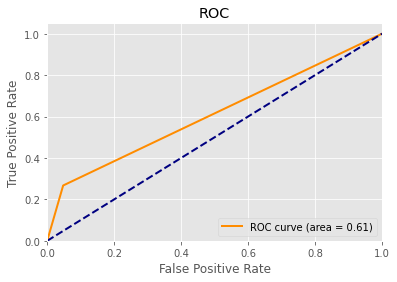

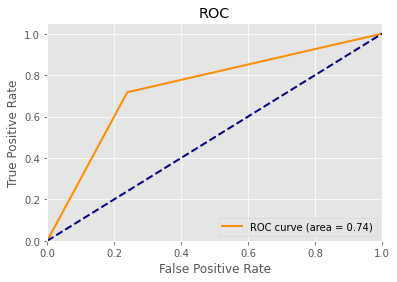

In [254]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Generate sample data
x = np.linspace(0, 10, 100)
y = 2 * x + np.random.normal(0, 1, 100)
fpr, tpr, thresholds = roc_curve(y_test_vacc1, y_predic)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")

fpr, tpr, thresholds = roc_curve(y_test_vacc2, y_predic_2)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.show()
